In [1]:
import sqlite3
import pandas as pd

# Connect to your database file
conn = sqlite3.connect("email_marketing.db")

# Read table names
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available tables:", tables)

# View Campaign table
df = pd.read_sql_query("SELECT * FROM Campaigns;", conn)
print(df)

conn.close()

Available tables:                    name
0                 Users
1             Campaigns
2      Email_Engagement
3  Campaign_Performance
4          Unsubscribes
    campaign_id campaign_name   send_date    email_subject  send_hour  \
0             1    Campaign 1  2024-07-22   Subject line 1         18   
1             2    Campaign 2  2024-08-28   Subject line 2          9   
2             3    Campaign 3  2024-02-20   Subject line 3         18   
3             4    Campaign 4  2024-02-26   Subject line 4         13   
4             5    Campaign 5  2024-06-02   Subject line 5         20   
5             6    Campaign 6  2024-02-14   Subject line 6          8   
6             7    Campaign 7  2024-05-31   Subject line 7         10   
7             8    Campaign 8  2024-06-26   Subject line 8         12   
8             9    Campaign 9  2024-08-24   Subject line 9          9   
9            10   Campaign 10  2024-06-08  Subject line 10         14   
10           11   Campaign 11  2024

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

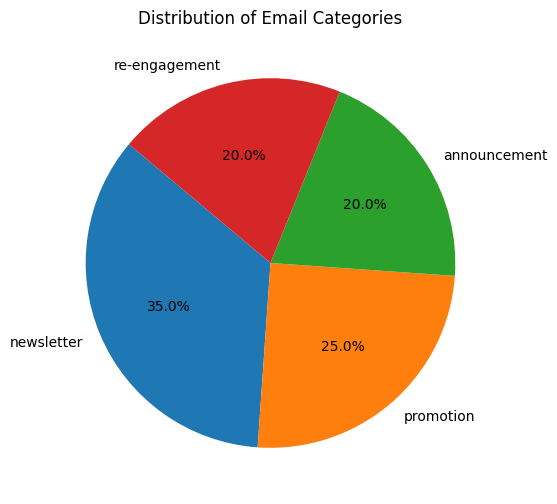

In [5]:
# Category over unscubscribe (Pie Chart)
category_counts = df['category'].value_counts() 
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Email Categories')           
plt.show()


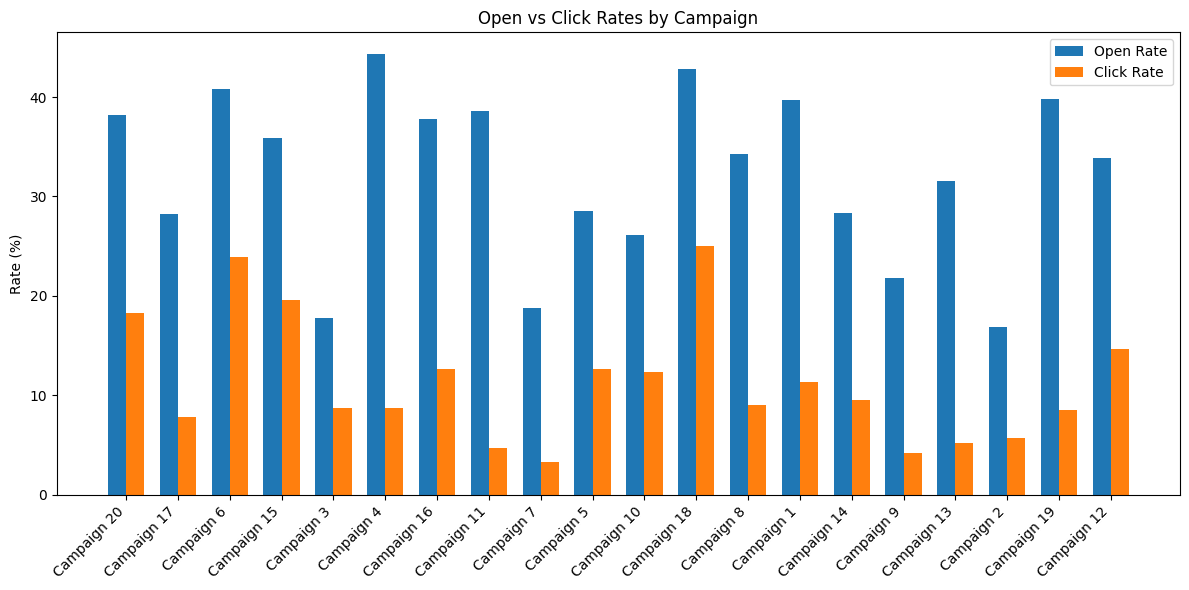

In [12]:
# Open vs Click Rates (Bar Chart)
import numpy as np

# Ensure the required columns exist. If missing, create synthetic rates for plotting.
rng = np.random.default_rng(42)
if 'open_rate' not in df.columns:
	df['open_rate'] = np.round(rng.uniform(15, 45, size=len(df)), 1)
if 'click_rate' not in df.columns:
	df['click_rate'] = np.round(df['open_rate'] * rng.uniform(0.1, 0.6, size=len(df)), 1)

plt.figure(figsize=(12, 6))
x = np.arange(len(df))
width = 0.35

plt.bar(x - width/2, df['open_rate'], width, color='tab:blue', label='Open Rate')
plt.bar(x + width/2, df['click_rate'], width, color='tab:orange', label='Click Rate')

plt.xticks(x, df['campaign_name'], rotation=45, ha='right')
plt.ylabel('Rate (%)')
plt.title('Open vs Click Rates by Campaign')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# KPI Summary Table
# compute from unsubscribes / total_emails_sent (percentage)
if 'unsubscribe_rate' not in df.columns:
	if 'unsubscribes' in df.columns and 'total_emails_sent' in df.columns:
		df['unsubscribe_rate'] = (df['unsubscribes'] / df['total_emails_sent'] * 100).round(2)
	else:
		df['unsubscribe_rate'] = 0.0

kpi_summary = df[['campaign_name', 'open_rate', 'click_rate', 'unsubscribe_rate']]
print("KPI Summary Table:")
print(kpi_summary)

KPI Summary Table:
   campaign_name  open_rate  click_rate  unsubscribe_rate
19   Campaign 20       38.2        18.3              0.09
16   Campaign 17       28.2         7.8              0.10
5     Campaign 6       40.8        23.9              0.12
14   Campaign 15       35.9        19.6              0.09
2     Campaign 3       17.8         8.7              0.10
3     Campaign 4       44.3         8.7              0.09
15   Campaign 16       37.8        12.6              0.12
10   Campaign 11       38.6         4.7              0.11
6     Campaign 7       18.8         3.3              0.09
4     Campaign 5       28.5        12.6              0.09
9    Campaign 10       26.1        12.3              0.10
17   Campaign 18       42.8        25.0              0.09
7     Campaign 8       34.3         9.0              0.09
0     Campaign 1       39.7        11.3              0.10
13   Campaign 14       28.3         9.5              0.09
8     Campaign 9       21.8         4.2              

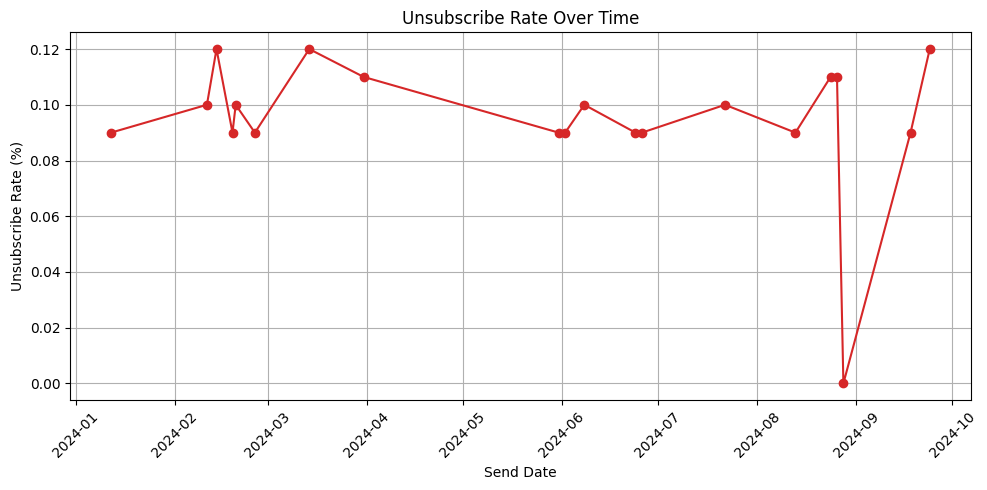

In [26]:
# unsubscribe Rate over Time (Line Chart)
if 'send_date' in df.columns:   
    df['send_date'] = pd.to_datetime(df['send_date'])
    df_sorted = df.sort_values('send_date')
    
    plt.figure(figsize=(10, 5))
    plt.plot(df_sorted['send_date'], df_sorted['unsubscribe_rate'], marker='o', color='tab:red')
    plt.title('Unsubscribe Rate Over Time')
    plt.xlabel('Send Date')
    plt.ylabel('Unsubscribe Rate (%)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()